<a href="https://colab.research.google.com/github/vanessa-oreza/python/blob/1-machine-learning/ml_desafio_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafío

Archivo: diabetes.csv

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no.

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('diabetes.csv')
df

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [6]:
X=df.drop(columns='diabetes')
X

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398
...,...,...,...,...,...
389,88,44,510,43.3,0.222
390,88,39,110,36.5,1.057
391,58,26,16,28.4,0.766
392,76,48,180,32.9,0.171


In [8]:
y=df.diabetes
y

,diabetes
0,0
1,1
2,1
3,1
4,1
...,...
389,1
390,1
391,0
392,0


2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X, X_prueba, y, y_prueba = train_test_split(X, y, stratify = y, test_size = 0.05, random_state = 7)
X_entrenamiento, X_val, y_entrenamiento, y_val = train_test_split(X, y, stratify = y, random_state = 7)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Después de la importación de los algoritmos, podemos instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest:

In [13]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [15]:
arbol.fit(X_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {arbol.score(X_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.75
Precisión de prueba: 0.7127659574468085


In [16]:
random_forest.fit(X_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {random_forest.score(X_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7285714285714285
Precisión de prueba: 0.6808510638297872


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

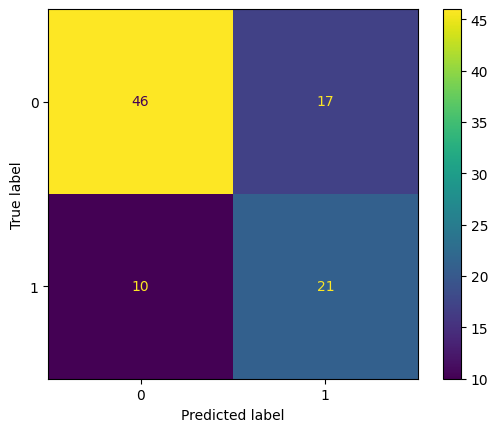

In [18]:
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

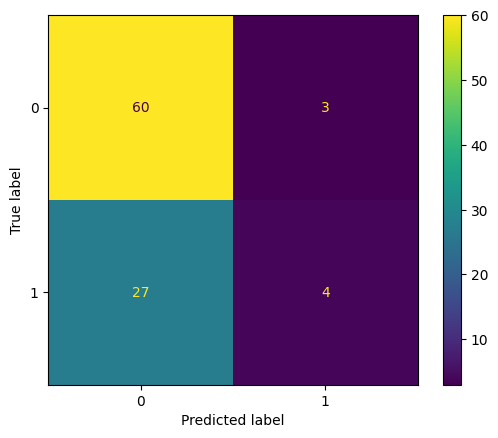

In [20]:
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);